<a href="https://colab.research.google.com/github/AruntejaLonka/FYP_MVSR/blob/main/FYP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#let's import the modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [153]:
#copy the data set path
al7178 = pd.read_excel('/content/mrr_AL7178.xlsx')

In [115]:
al7178.head()

,Current(I),P_on,P_off,V,MRR,TWR
0,4,100,50,30,29.339853,1.075269
1,12,100,50,30,638.141809,12.186380
2,4,1000,50,30,66.014670,0.358423
3,12,1000,50,30,95.354523,1.792115
4,4,100,100,30,73.349633,1.792115


In [6]:
#Getting the shape of dataset with rows and columns
print(al7178.shape)

(16, 6)


In [7]:
#Getting all the columns
print("Features of the dataset:")
al7178.columns

Features of the dataset:


Index(['Current(I)', 'P_on', 'P_off', 'V', 'MRR', 'TWR'], dtype='object')

In [9]:
al7178.describe()

,Current(I),P_on,P_off,V,MRR,TWR
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,8.000000,550.000000,75.000000,46.875000,236.965159,3.337814
std,4.131182,464.758002,25.819889,15.370426,248.943291,2.916893
min,4.000000,100.000000,50.000000,30.000000,22.004890,0.358423
25%,4.000000,100.000000,50.000000,30.000000,65.831296,1.612903
50%,8.000000,550.000000,75.000000,60.000000,84.352078,2.508961
75%,12.000000,1000.000000,100.000000,60.000000,407.090465,4.301075
max,12.000000,1000.000000,100.000000,60.000000,777.506112,12.186380


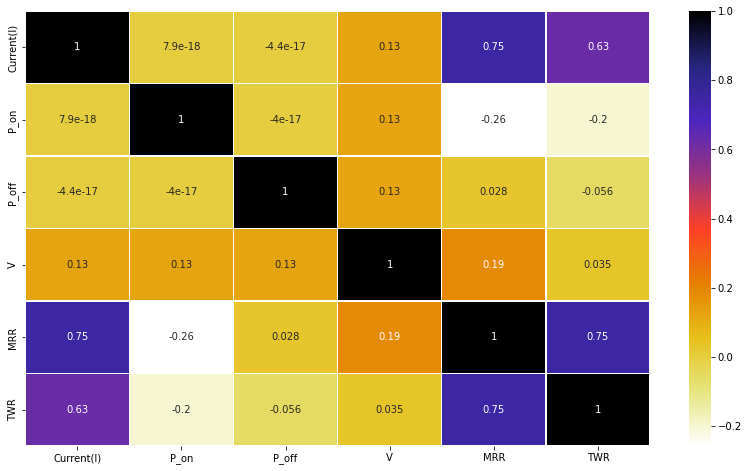

In [10]:
# Heatmap:
plt.figure(figsize=(14,8))
sns.heatmap(al7178.corr(),annot=True,cmap=plt.cm.CMRmap_r,linewidths=.5)

In [13]:
df = al7178.drop('TWR',axis=1)

In [16]:
df.head()

,Current(I),P_on,P_off,V,MRR
0,4,100,50,30,29.339853
1,12,100,50,30,638.141809
2,4,1000,50,30,66.014670
3,12,1000,50,30,95.354523
4,4,100,100,30,73.349633


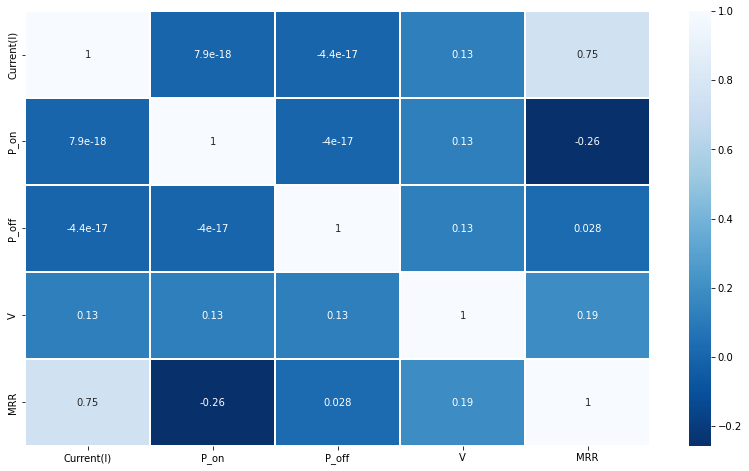

In [21]:
# Heatmap:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(),annot=True,cmap=plt.cm.Blues_r,linewidths=.5)

In [23]:
X = df.drop('MRR',axis=1)
y = df['MRR']

In [26]:
model= sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    MRR   R-squared (uncentered):                   0.812
Model:                            OLS   Adj. R-squared (uncentered):              0.750
Method:                 Least Squares   F-statistic:                              12.99
Date:                Tue, 17 May 2022   Prob (F-statistic):                    0.000256
Time:                        18:28:17   Log-Likelihood:                         -102.48
No. Observations:                  16   AIC:                                      213.0
Df Residuals:                      12   BIC:                                      216.1
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Current(I)    41.3980      9.930      4.169      0.001      19.762      63.034
P_on          -0.1604      0.093     -1.727      0.110      -0.363       0.042
P_off         -0.6210      1.393     -0.446      0.664      -3.655       2.413
V              1.0108      2.477      0.408      0.690      -4.387       6.409
==============================================================================
Omnibus:                        0.179   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.914   Jarque-Bera (JB):                0.385
Skew:                          -0.000   Prob(JB):                        0.825
Kurtosis:                       2.240   Cond. No.                         169.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
#Creat test and train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.35, random_state=10)
print(X_train.shape)
print(X_test.shape)

(10, 4)
(6, 4)


## **VI. Build models**
Now we start building models for our classiffication problem. We have used some of the models like,

(1)Rigid regression

(2)Linear regression

(3)Gradient Boosting Regressor

(4)Random Forest

(5)Decision Tree




In [111]:
dtc =DecisionTreeRegressor()
ran =  RandomForestRegressor()
gb_model = GradientBoostingRegressor()
linear = LinearRegression()
elasticnet = ElasticNet() 



In [112]:
models = {"Decision tree" : dtc,
          "Random forest" : ran,
          "Gradient boosting " : gb_model,
          "Ridge" : ridge,
          "Linear Regression" : reg
          }
scores= {}

In [113]:
for key, value in models.items():    
    model = value
    model.fit(X_train, y_train)
    scores[key] = model.score(X_test, y_test)

In [114]:
# after feature election
scores_frame = pd.DataFrame(scores, index=["Accuracy Score"]).T
scores_frame.sort_values(by=["Accuracy Score"], axis=0 ,ascending=False, inplace=True)
scores_frame

,Accuracy Score
Decision tree,0.965154
Gradient boosting,0.953279
Random forest,0.560431
Ridge,0.062913
Linear Regression,0.054554


In [141]:
df.head()

,Current(I),P_on,P_off,V,MRR
0,4,100,50,30,29.339853
1,12,100,50,30,638.141809
2,4,1000,50,30,66.014670
3,12,1000,50,30,95.354523
4,4,100,100,30,73.349633


In [148]:
list1 = [20,	1000,	75,	7	]

In [149]:
inp = np.array(list1)
ip = inp.reshape((1, -1))
mp1 = dtc.predict(ip)    

array([95.35452323])

### **Models for Cu:**

In [152]:
#copy the data set path
cu = pd.read_excel('/content/DF_COPPER.xlsx')

In [155]:
cu.head()

,Sl no,Current(I),P_on,P_off,V,MRR,TWR
0,1,4,100,50,30,344.743276,0.0
1,2,12,100,50,30,2171.149144,0.0
2,3,4,1000,50,30,29.339853,0.0
3,4,12,1000,50,30,2369.193154,0.0
4,5,4,100,100,30,403.422983,0.0


In [159]:
df_cu = cu.drop(['TWR','Sl no'],axis=1)

In [160]:
df_cu.head()

,Current(I),P_on,P_off,V,MRR
0,4,100,50,30,344.743276
1,12,100,50,30,2171.149144
2,4,1000,50,30,29.339853
3,12,1000,50,30,2369.193154
4,4,100,100,30,403.422983


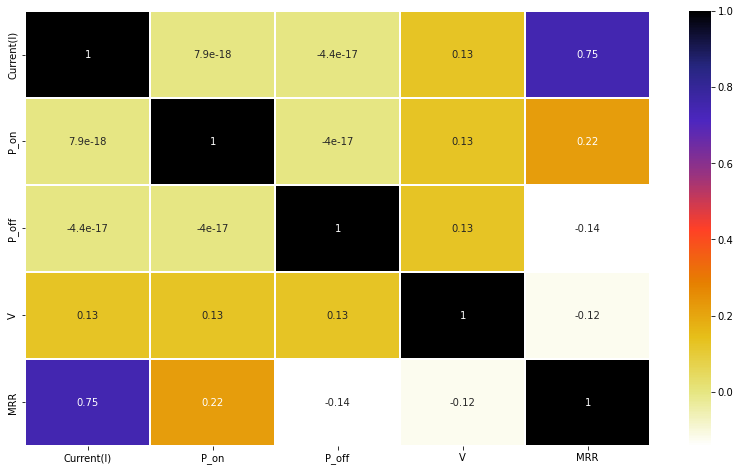

In [161]:
# Heatmap:
plt.figure(figsize=(14,8))
sns.heatmap(df_cu.corr(),annot=True,cmap=plt.cm.CMRmap_r,linewidths=.5)

In [163]:
X_c = df_cu.drop('MRR',axis=1)
y_c = df_cu['MRR']

In [164]:
model= sm.OLS(y_c, X_c).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    MRR   R-squared (uncentered):                   0.896
Model:                            OLS   Adj. R-squared (uncentered):              0.861
Method:                 Least Squares   F-statistic:                              25.79
Date:                Tue, 17 May 2022   Prob (F-statistic):                    8.16e-06
Time:                        19:24:42   Log-Likelihood:                         -119.25
No. Observations:                  16   AIC:                                      246.5
Df Residuals:                      12   BIC:                                      249.6
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Current(I)   149.9793     28.316      5.297      0.000      88.285     211.674
P_on           0.4476      0.265      1.690      0.117      -0.129       1.025
P_off         -0.5926      3.971     -0.149      0.884      -9.245       8.060
V             -7.4556      7.064     -1.055      0.312     -22.848       7.937
==============================================================================
Omnibus:                        0.295   Durbin-Watson:                   2.886
Prob(Omnibus):                  0.863   Jarque-Bera (JB):                0.455
Skew:                          -0.182   Prob(JB):                        0.796
Kurtosis:                       2.258   Cond. No.                         169.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [199]:
#Creat test and train data
from sklearn.model_selection import train_test_split
X_train_cu, X_test_cu, y_train_cu, y_test_cu = train_test_split(X_c,y_c, test_size=0.45, random_state=16)
print(X_train_cu.shape)
print(X_test_cu.shape)

(8, 4)
(8, 4)


In [200]:
for key, value in models.items():    
    model = value
    model.fit(X_train_cu, y_train_cu)
    scores[key] = model.score(X_test_cu, y_test_cu)

In [201]:
# after feature election
scores_frame = pd.DataFrame(scores, index=["Accuracy Score"]).T
scores_frame.sort_values(by=["Accuracy Score"], axis=0 ,ascending=False, inplace=True)
scores_frame

,Accuracy Score
Gradient boosting,0.580312
Random forest,0.491047
Decision tree,0.414728
Ridge,0.180221
Linear Regression,0.165039


In [209]:
def MRR_virtual_mvsr_cal():
  print("Welocme to MVSR EDM LAB")
  print("Now You can able to connect our Lab Incharge virtually:")
  print("Today experiment was finding MRR on superni90 on EDM using differnt tools:")
 
  name = input("Enter your name:\n")
  print(f"hay{name},now we can find out Metal removal rate for Superni90:")
  tool = input(f"hay {name} can you choose Tool (cu/al7178),,#type lower cases only")
  i = input("Enter your input Current in amp?")
  v = input("Enter your input Voltage in Volts?")
  t_on =input("Enter your input Pulse_on time?")
  t_of = input("Ener your input Pulse _off time?")
  list1 = [i,t_on,t_of,v]
  inp = np.array(list1)
  ip = inp.reshape((1, -1))
    
  if tool == 'cu':
     mp1 = gb_model.predict(ip)
     print(f"hay{name} you Metal removal rate of Superni90 using Copper is {mp1} g/hour")

  elif tool == 'al7178':
    mp2 = dtc.predict(ip)
    print(f"hay{name} you Metal removal rate of Superni90 using al7178 is {mp2} g/hour")
  else:
    print(f"Hay {name} somthing wrong with your input(invalid input)/That tool is not available in our lab.")  





In [210]:
MRR_virtual_mvsr_cal()


Welocme to MVSR EDM LAB
Now You can able to connect our Lab Incharge virtually:
Today experiment was finding MRR on superni90 on EDM using differnt tools:
Enter your name:
Arun
hayArun,now we can find out Metal removal rate for Superni90:
hay Arun can you choose Tool (cu/al7178),,#type lower cases onlycu
Enter your input Current in amp?4
Enter your input Voltage in Volts?60
Enter your input Pulse_on time?50
Ener your input Pulse _off time?100
hayArun you Metal removal rate of Superni90 using Copper is [533.68569667]


In [ ]:
df_cu